In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("kaggle_survey_2017_2021.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB


In [5]:
df["Q2"]=df["Q2"].replace(["Prefer not to say","Prefer to self-describe","A different identity","Nonbinary","Non-binary, genderqueer, or gender non-conforming"], np.nan)
df.dropna(subset=["Q2"],inplace=True)
df["Q2"]=df["Q2"].replace("Man", "Male")
df["Q2"]=df["Q2"].replace("Woman", "Female")

In [6]:
df["Q2"].value_counts()

Q2
Male                                      85565
Female                                    18768
What is your gender? - Selected Choice        1
Name: count, dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Male,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Male,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Male,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Male,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106295,2017,NaN,30-34,Male,People 's Republic of China,Master's degree,DBA/Database Engineer,3 to 5 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106297,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106298,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106300,2017,NaN,NaN,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.rename(columns=
          {"-": "Year",
           "Time from Start to Finish (seconds)":"Survey Duration",
           "Q1":"Age",
           "Q2":"Gender",
           "Q3":"Country",
           "Q4":"Education",
           "Q5":"Job Title",
           "Q6":"Years of Experience",
           "Q8":"Aspiring Data Scientist Language",
           "Q25":"Yealy Salary",
           },inplace=True)

In [10]:
df.isnull().sum()

Year                   0
Survey Duration    12012
Age                  297
Gender                 0
Country               32
                   ...  
Q38_B_Part_6       98655
Q38_B_Part_7       98719
Q38_B_Part_9       98749
Q38_B_Part_11      99916
Q38_B_OTHER        99309
Length: 293, dtype: int64

In [11]:
df["Age"].fillna(df["Age"].mode()[0],inplace=True)
df["Country"].fillna(df["Country"].mode()[0],inplace=True)

In [12]:
df.isnull().sum()

Year                   0
Survey Duration    12012
Age                    0
Gender                 0
Country                0
                   ...  
Q38_B_Part_6       98655
Q38_B_Part_7       98719
Q38_B_Part_9       98749
Q38_B_Part_11      99916
Q38_B_OTHER        99309
Length: 293, dtype: int64

In [13]:
df["Education"] = df["Education"].replace(
    {"Bachelorâ€™s degree": "Bachelor's degree",
     "Masterâ€™s degree": "Master's degree"}
)

In [14]:
df

,Year,Survey Duration,Age,Gender,Country,Education,Job Title,Years of Experience,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Male,India,Bachelor's degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Male,Indonesia,Master's degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Male,Pakistan,Master's degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Male,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106295,2017,NaN,30-34,Male,People 's Republic of China,Master's degree,DBA/Database Engineer,3 to 5 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106297,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106298,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106300,2017,NaN,25-29,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df["Programming Skills"] = df[["Q7_Part_1", "Q7_Part_2", "Q7_Part_3", "Q7_Part_4", "Q7_Part_5", "Q7_Part_6", "Q7_Part_7", "Q7_Part_8", "Q7_Part_9", "Q7_Part_10", "Q7_Part_11", "Q7_Part_12", "Q7_OTHER"]].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)
df.drop(columns=["Q7_Part_1", "Q7_Part_2", "Q7_Part_3", "Q7_Part_4", "Q7_Part_5", "Q7_Part_6", "Q7_Part_7", "Q7_Part_8", "Q7_Part_9", "Q7_Part_10", "Q7_Part_11", "Q7_Part_12", "Q7_OTHER"], inplace=True)

In [16]:
df["IDE Used"]=df[["Q9_Part_1", "Q9_Part_2", "Q9_Part_3", "Q9_Part_5", "Q9_Part_6", "Q9_Part_7", "Q9_Part_8", "Q9_Part_9", "Q9_Part_10", "Q9_Part_12", "Q9_OTHER"]].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)
df.drop(columns=["Q9_Part_1", "Q9_Part_2", "Q9_Part_3", "Q9_Part_5", "Q9_Part_6", "Q9_Part_7", "Q9_Part_8", "Q9_Part_9", "Q9_Part_10", "Q9_Part_12", "Q9_OTHER"], inplace=True)

In [17]:
df

,Year,Survey Duration,Age,Gender,Country,Education,Job Title,Years of Experience,Aspiring Data Scientist Language,Q10_Part_1,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER,Programming Skills,IDE Used
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming language would you recommend ...,Which of the following hosted notebook product...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",What programming languages do you use on a reg...,Which of the following integrated development ...
1,2021,910,50-54,Male,India,Bachelor's degree,Other,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Python, R",Vim / Emacs
2,2021,784,50-54,Male,Indonesia,Master's degree,Program/Project Manager,20+ years,Python,Kaggle Notebooks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SQL, C, C++, Java",Notepad++
3,2021,924,22-24,Male,Pakistan,Master's degree,Software Engineer,1-3 years,Python,Kaggle Notebooks,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,"Python, C++, Java","PyCharm , Other"
4,2021,575,45-49,Male,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Spyder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106295,2017,NaN,30-34,Male,People 's Republic of China,Master's degree,DBA/Database Engineer,3 to 5 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
106297,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
106298,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
106300,2017,NaN,25-29,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,


In [18]:
df

,Year,Survey Duration,Age,Gender,Country,Education,Job Title,Years of Experience,Aspiring Data Scientist Language,Q10_Part_1,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER,Programming Skills,IDE Used
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming language would you recommend ...,Which of the following hosted notebook product...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",What programming languages do you use on a reg...,Which of the following integrated development ...
1,2021,910,50-54,Male,India,Bachelor's degree,Other,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Python, R",Vim / Emacs
2,2021,784,50-54,Male,Indonesia,Master's degree,Program/Project Manager,20+ years,Python,Kaggle Notebooks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SQL, C, C++, Java",Notepad++
3,2021,924,22-24,Male,Pakistan,Master's degree,Software Engineer,1-3 years,Python,Kaggle Notebooks,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,"Python, C++, Java","PyCharm , Other"
4,2021,575,45-49,Male,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Spyder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106295,2017,NaN,30-34,Male,People 's Republic of China,Master's degree,DBA/Database Engineer,3 to 5 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
106297,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
106298,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
106300,2017,NaN,25-29,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,


In [19]:
cols = list(df.columns)
cols.insert(cols.index("Years of Experience") + 1, cols.pop(cols.index("Programming Skills")))
df = df[cols]
cols = list(df.columns)
cols.insert(cols.index("Aspiring Data Scientist Language") + 1, cols.pop(cols.index("IDE Used")))
df = df[cols]
cols = list(df.columns)
cols.insert(cols.index("IDE Used") + 1, cols.pop(cols.index("Yealy Salary")))
df = df[cols]

In [20]:
df.drop(columns=list(df.columns[12:]) + ["Survey Duration"],inplace=True)

In [21]:
df.drop(0,inplace=True)

In [22]:
df["Years of Experience"].value_counts()

Years of Experience
3-5 years                                               15739
1-2 years                                               13735
< 1 years                                               12837
5-10 years                                               9484
1-3 years                                                7756
10-20 years                                              5920
< 1 year                                                 4494
20+ years                                                3662
I have never written code                                2960
1 to 2 years                                             2611
3 to 5 years                                             2542
Less than a year                                         1801
More than 10 years                                       1658
6 to 10 years                                            1358
I have never written code but I want to learn             802
I don't write code to analyze data                

In [23]:
df["Years of Experience"] = df["Years of Experience"].replace(
    {"1 to 2 years": "1-3 years",
     "1-2 years": "1-3 years",
     "3 to 5 years": "3-5 years",
     "6 to 10 years":"5-10 years",
     "< 1 years":"0 years",
     "< 1 year":"0 years",
     "I have never written code but I want to learn":"0 years",
     "I have never written code":"0 years",
     "Less than a year":"0 years",
     "I don't write code to analyze data":"0 years",
     "I have never written code and I do not want to learn":"0 years",
     "More than 10 years":"10-20 years",
     "20+ years":"20-30 years",
     }
)

In [24]:
df.columns

Index(['Year', 'Age', 'Gender', 'Country', 'Education', 'Job Title',
       'Years of Experience', 'Programming Skills',
       'Aspiring Data Scientist Language', 'IDE Used', 'Yealy Salary'],
      dtype='object')

In [25]:
df["Years of Experience"].fillna("0 years",inplace=True)
df

,Year,Age,Gender,Country,Education,Job Title,Years of Experience,Programming Skills,Aspiring Data Scientist Language,IDE Used,Yealy Salary
1,2021,50-54,Male,India,Bachelor's degree,Other,5-10 years,"Python, R",Python,Vim / Emacs,"25,000-29,999"
2,2021,50-54,Male,Indonesia,Master's degree,Program/Project Manager,20-30 years,"SQL, C, C++, Java",Python,Notepad++,"60,000-69,999"
3,2021,22-24,Male,Pakistan,Master's degree,Software Engineer,1-3 years,"Python, C++, Java",Python,"PyCharm , Other",$0-999
4,2021,45-49,Male,Mexico,Doctoral degree,Research Scientist,20-30 years,Python,Python,Spyder,"30,000-39,999"
5,2021,45-49,Male,India,Doctoral degree,Other,0 years,"Python, C, MATLAB",Python,"Spyder , MATLAB","30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...
106295,2017,30-34,Male,People 's Republic of China,Master's degree,DBA/Database Engineer,3-5 years,,NaN,,NaN
106297,2017,22-24,Female,Other,Master's degree,NaN,0 years,,NaN,,NaN
106298,2017,25-29,Male,Indonesia,Bachelor's degree,Programmer,1-3 years,,Python,,NaN
106300,2017,25-29,Female,Singapore,I prefer not to answer,NaN,0 years,,NaN,,NaN


In [26]:
salary_mapping = {
    "$0-999": "0-10,000",
    "I do not wish to disclose my approximate yearly compensation": "0-10,000",
    "1,000-1,999": "0-10,000",
    "2,000-2,999": "0-10,000",
    "3,000-3,999": "0-10,000",
    "4,000-4,999": "0-10,000",
    "5,000-7,499": "0-10,000",
    "7,500-9,999": "0-10,000",
    "10,000-14,999": "10-20,000",
    "15,000-19,999": "10-20,000",
    "20,000-24,999": "20-30,000",
    "25,000-29,999": "20-30,000",
    "30,000-39,999": "30-40,000",
    "40,000-49,999": "40-50,000",
    "50,000-59,999": "50-60,000",
    "60,000-69,999": "60-70,000",
    "70,000-79,999": "70-80,000",
    "80,000-89,999": "80-90,000",
    "90,000-99,999": "90-100,000",
    "100,000-124,999": "100-125,000",
    "125,000-149,999": "125-150,000",
    "150,000-199,999": "150-200,000",
    "200,000-249,999": "200-250,000",
    "250,000-299,999": "250-300,000",
    "300,000-499,999": "300,000-500,000",
    "500,000-599,999": "500,000-600,000",
    "600,000-699,999": "600,000-700,000",
    "700,000-799,999": "700,000-800,000",
    "800,000-899,999": "800,000-900,000",
    "900,000-999,999": "900,000-1000,000",
    ">100,000": "100,000-"
}

df["Yealy Salary"] = df["Yealy Salary"].replace(salary_mapping)

In [27]:
df["Yealy Salary"].fillna("0-10,000",inplace=True)

In [28]:
df.dropna(inplace=True)

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df["Country"] = df["Country"].drop(df[df["Country"] == "Israel"].index)
df.dropna(inplace=True)

<Axes: xlabel='Gender', ylabel='count'>

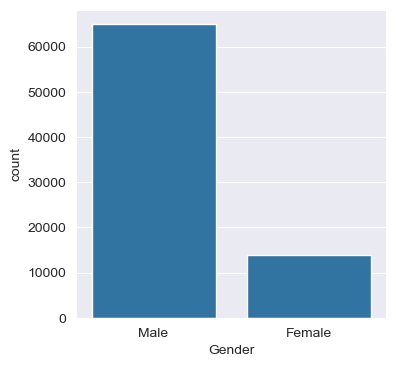

In [31]:
plt.figure(figsize= (4, 4))
sns.countplot(x= "Gender", data= df)

<Axes: xlabel='Age', ylabel='count'>

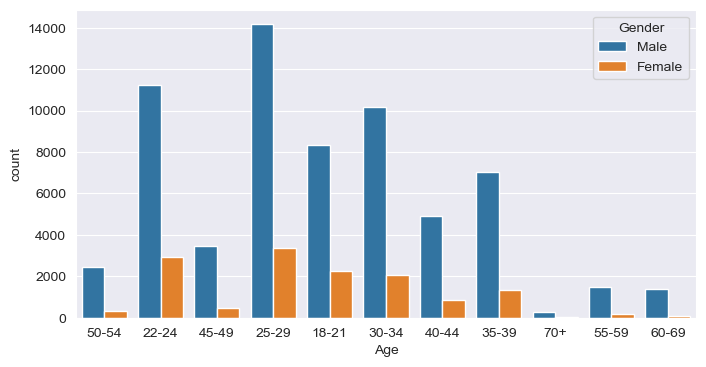

In [32]:
plt.figure(figsize= (8, 4))
sns.countplot(x= 'Age', data= df, hue= 'Gender')

<Axes: xlabel='count', ylabel='Country'>

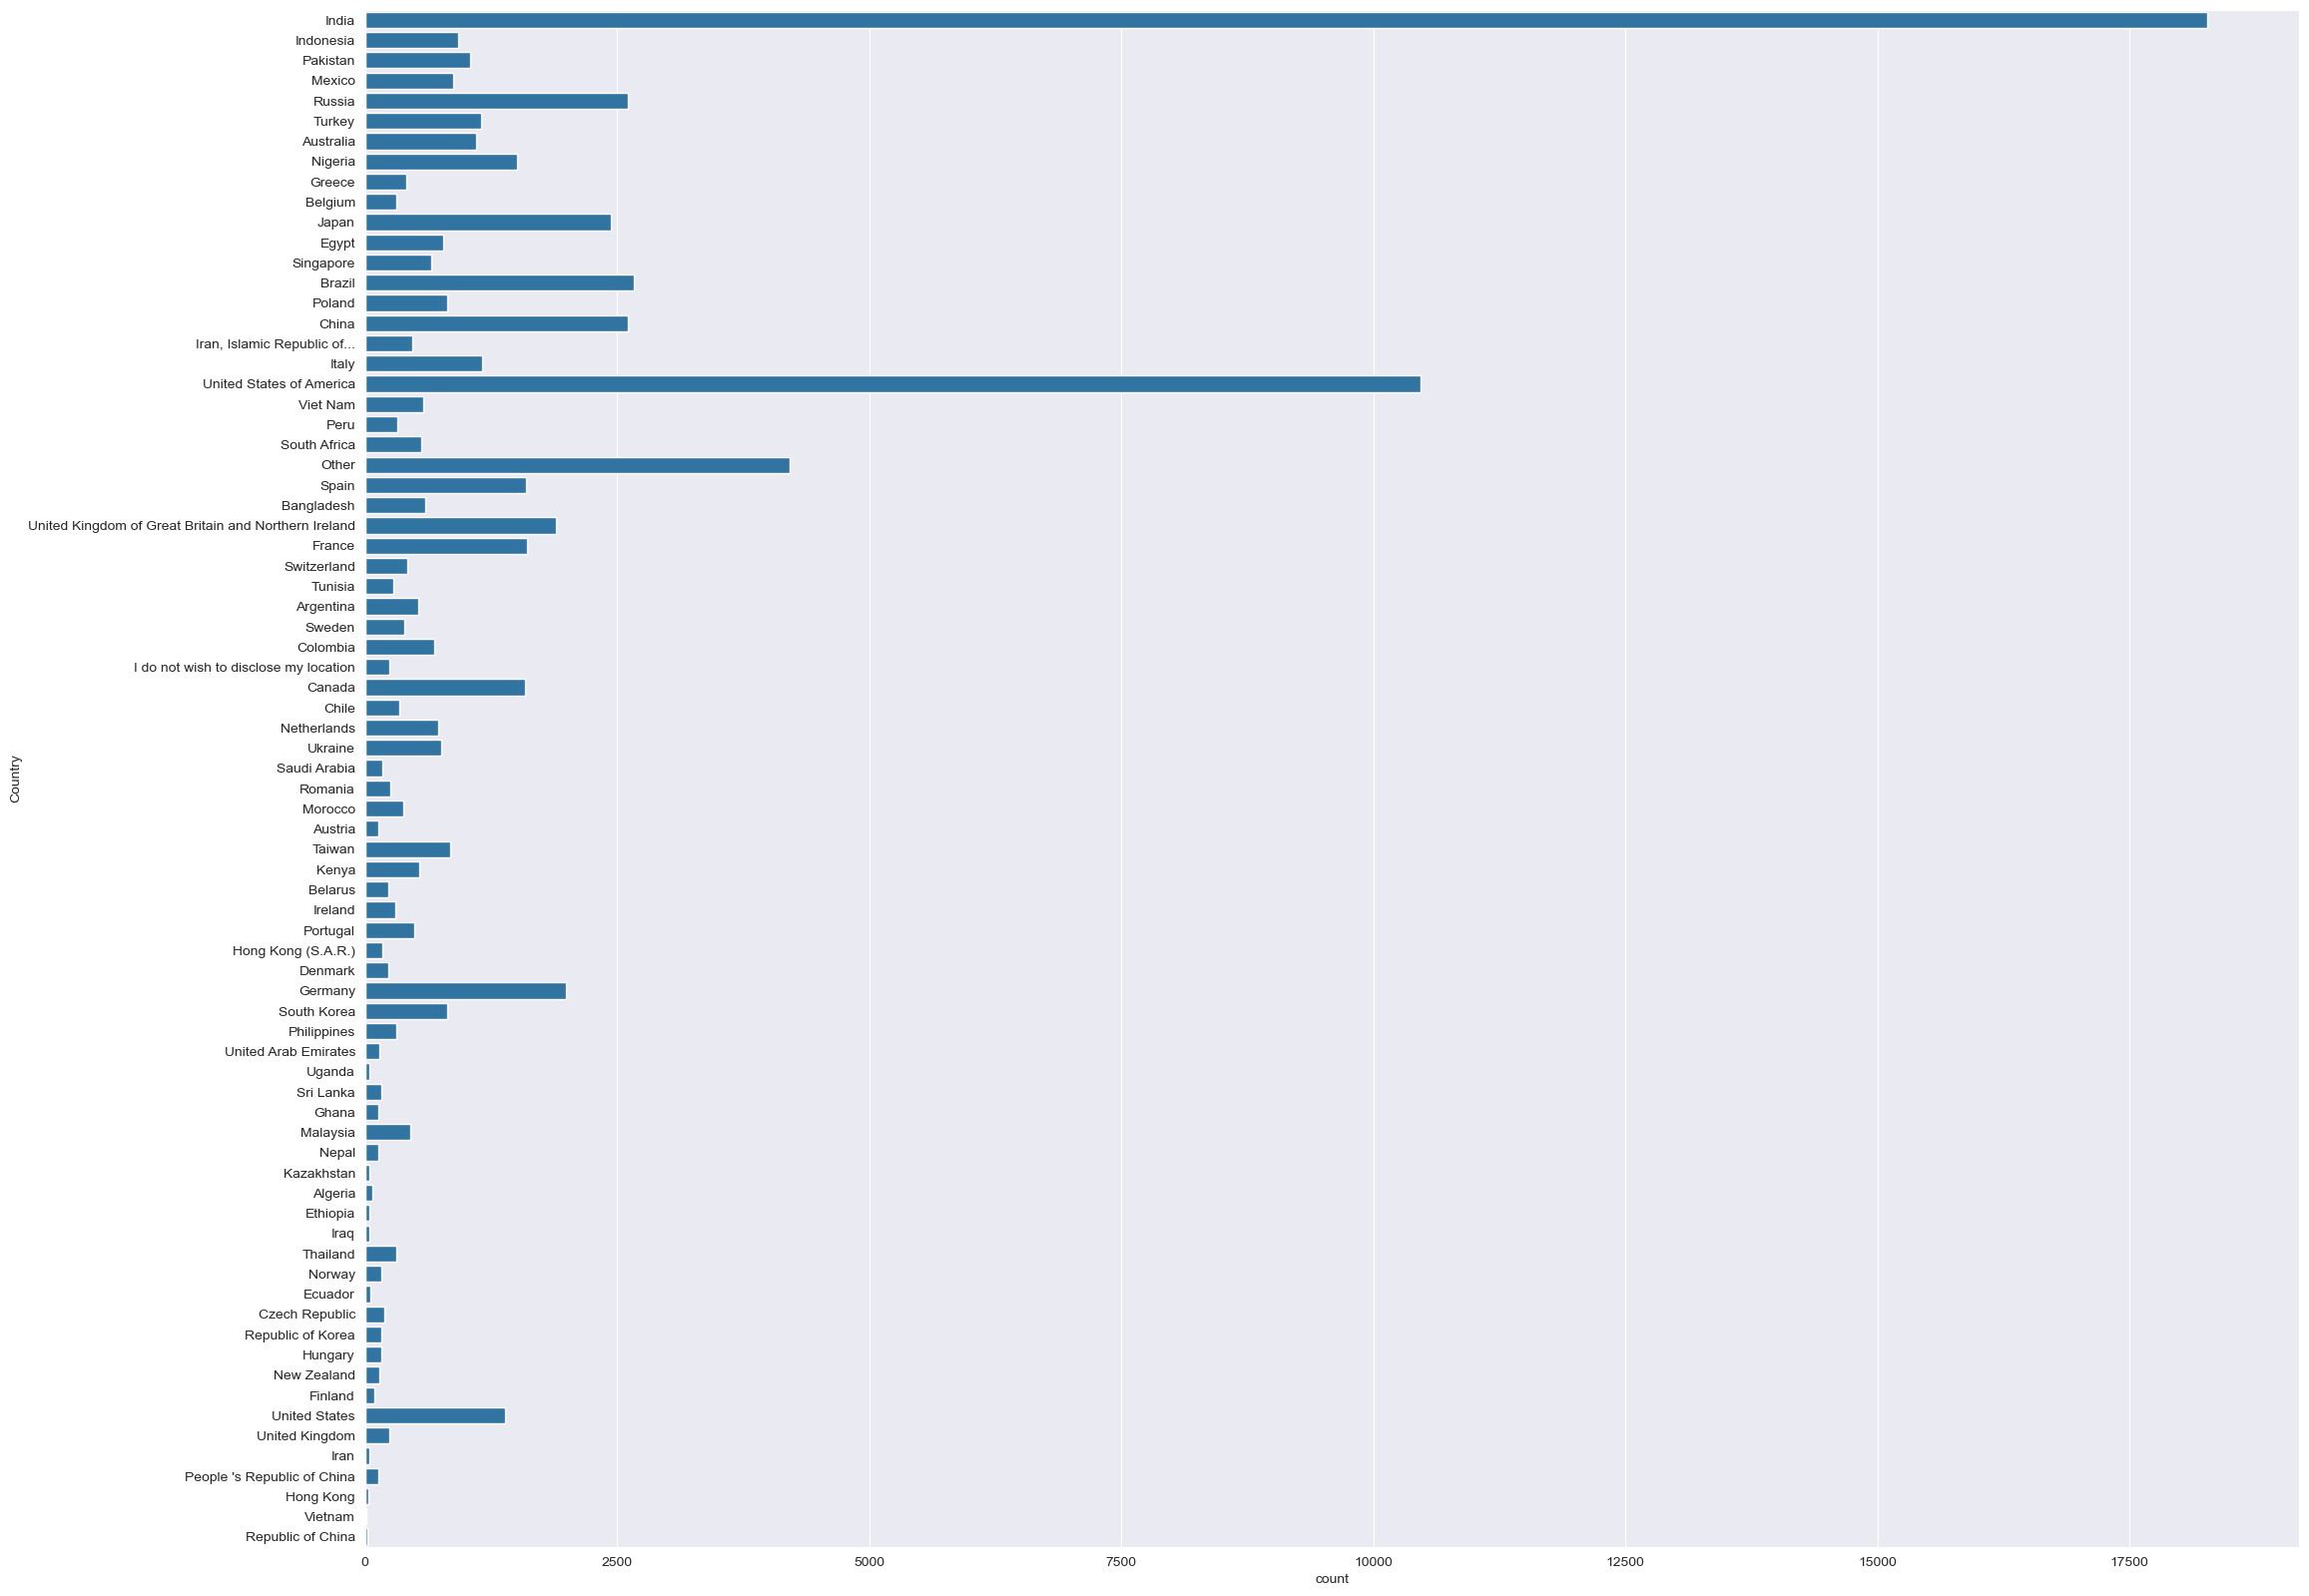

In [33]:
plt.figure(figsize= (25, 20))
sns.countplot(y ='Country', data = df)

<Axes: xlabel='count', ylabel='Education'>

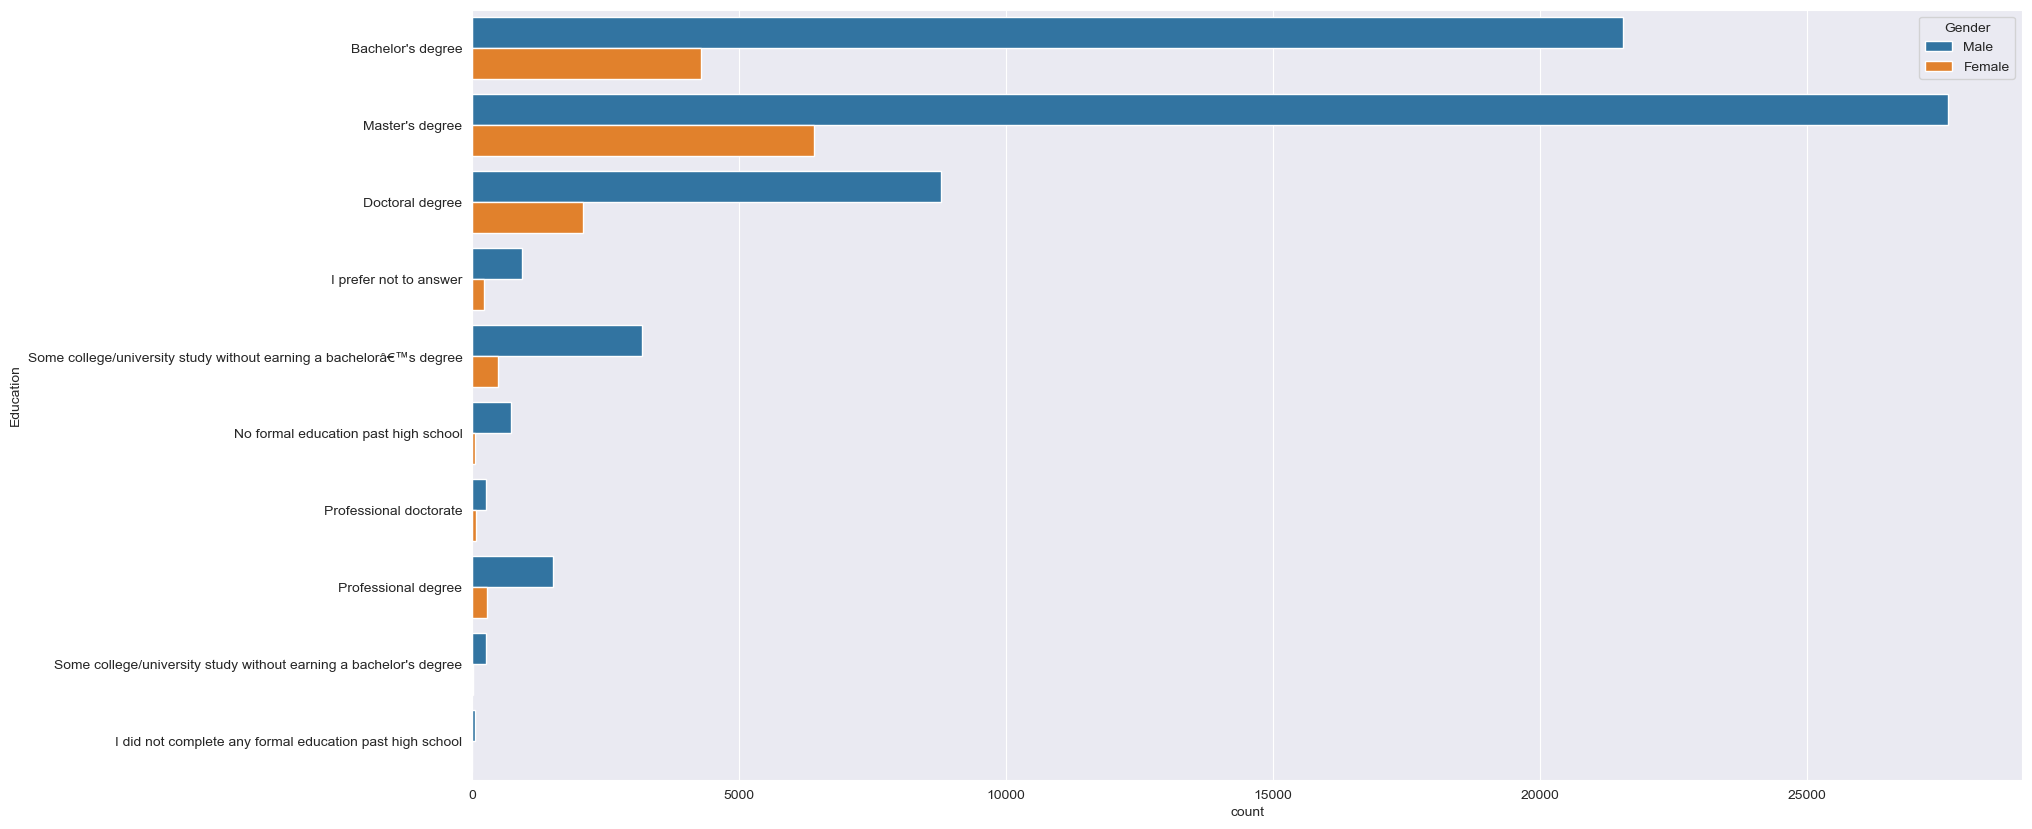

In [34]:
plt.figure(figsize= (20, 10))
sns.countplot(y= 'Education', data= df, hue="Gender")

<Axes: xlabel='count', ylabel='Job Title'>

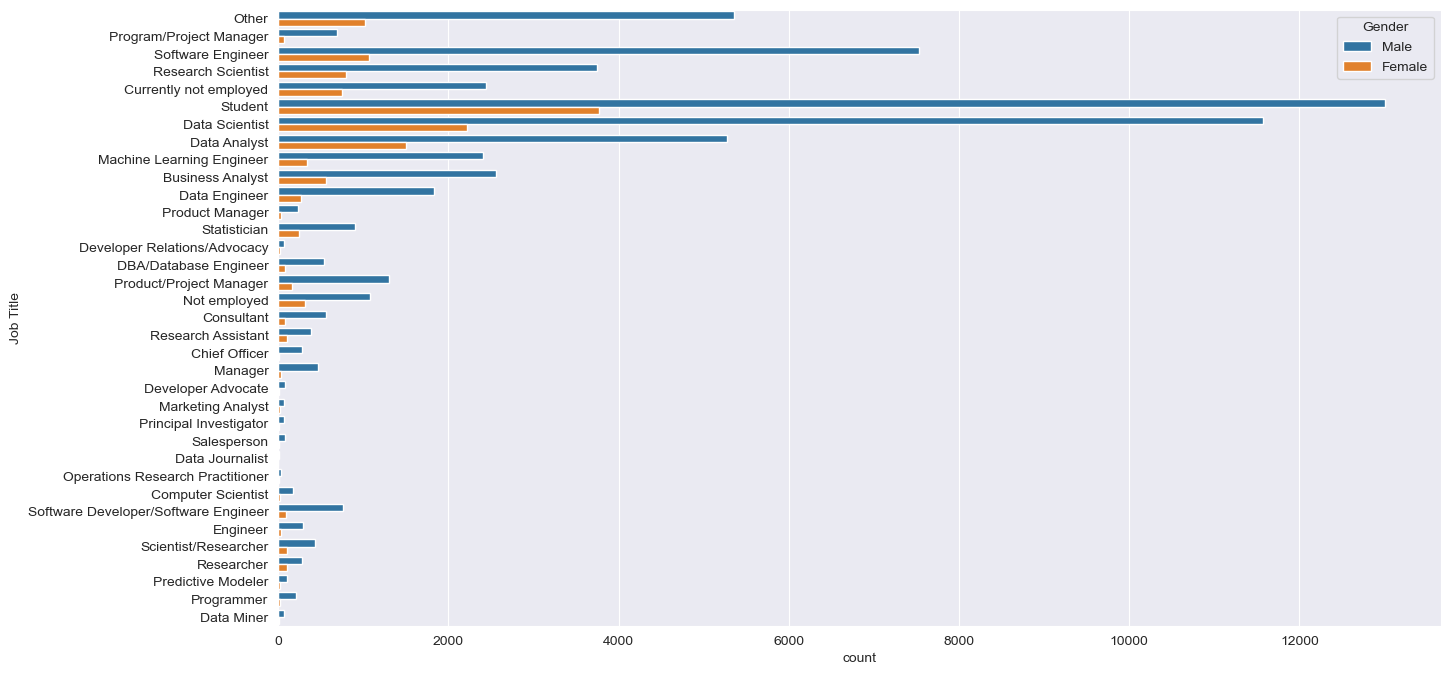

In [35]:
plt.figure(figsize= (15, 8))
sns.countplot(y= 'Job Title', data= df, hue="Gender")

<Axes: xlabel='count', ylabel='Yealy Salary'>

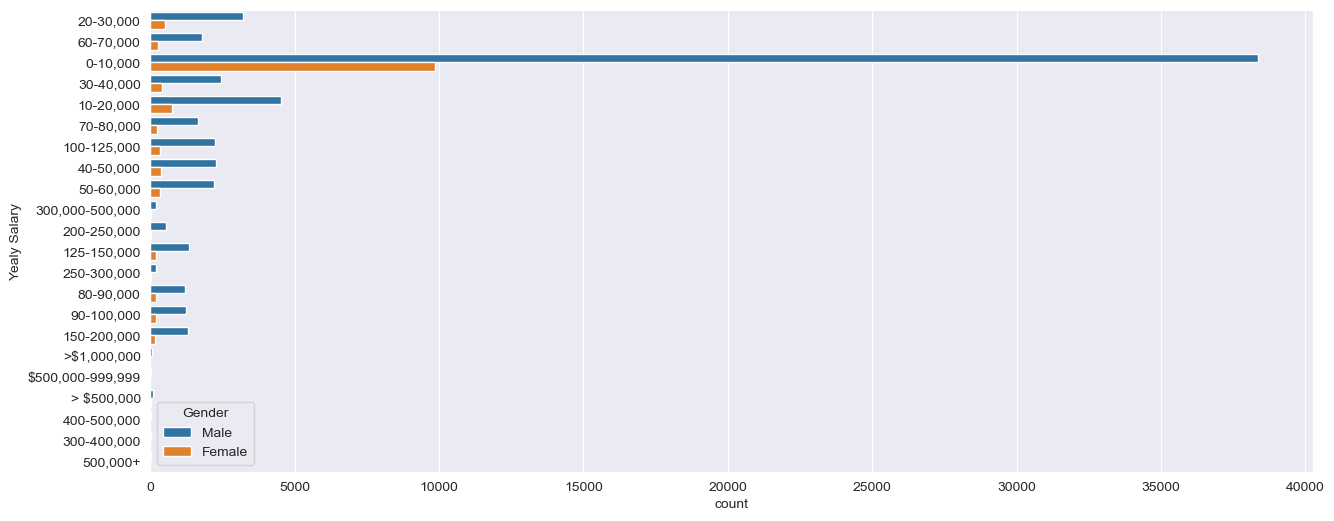

In [57]:
plt.figure(figsize= (15, 6))
sns.countplot(y= 'Yealy Salary', data= df,hue="Gender")

<Axes: xlabel='Years of Experience', ylabel='count'>

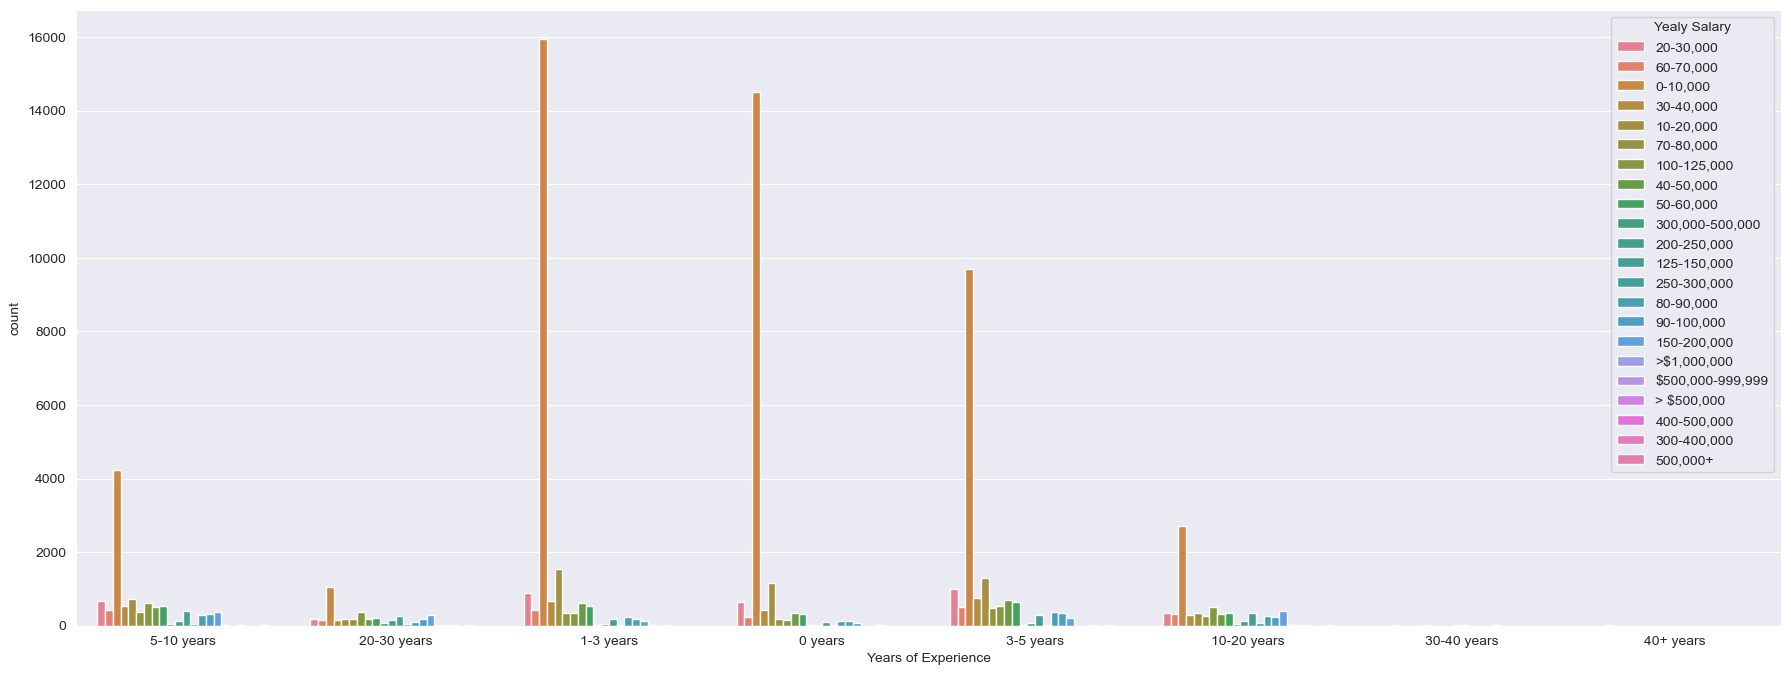

In [70]:
plt.figure(figsize= (22, 8))
sns.countplot(x= 'Years of Experience', hue= 'Yealy Salary', data= df)

<Axes: xlabel='Country', ylabel='count'>

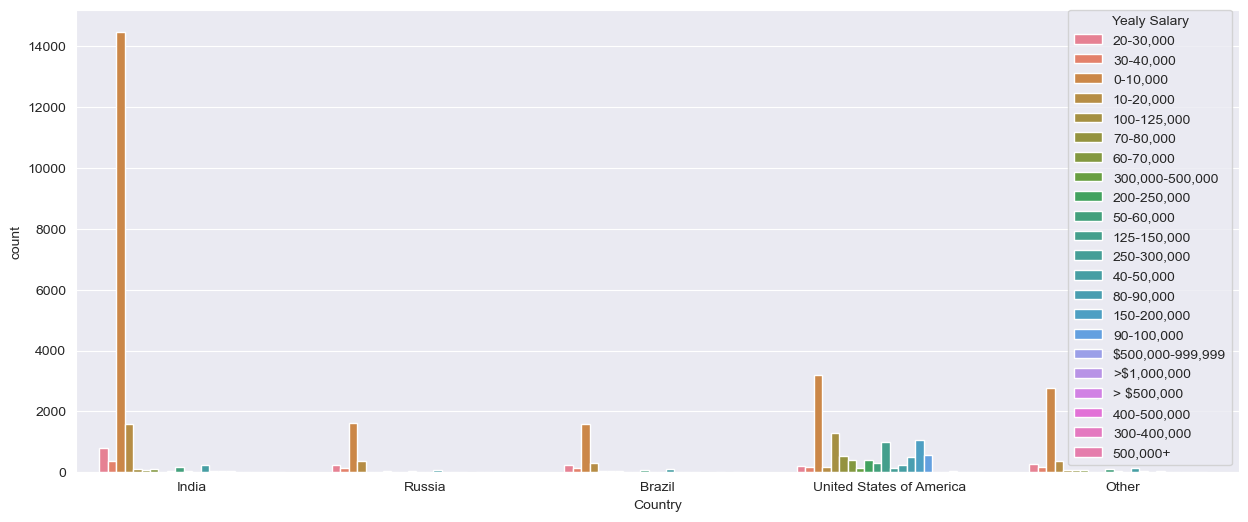

In [72]:
plt.figure(figsize= (15, 6))
top_5_country = df['Country'].value_counts().head(5).index
sns.countplot(x= 'Country', data= df[df['Country'].isin(top_5_country)], hue="Yealy Salary")

<Axes: xlabel='Job Title', ylabel='count'>

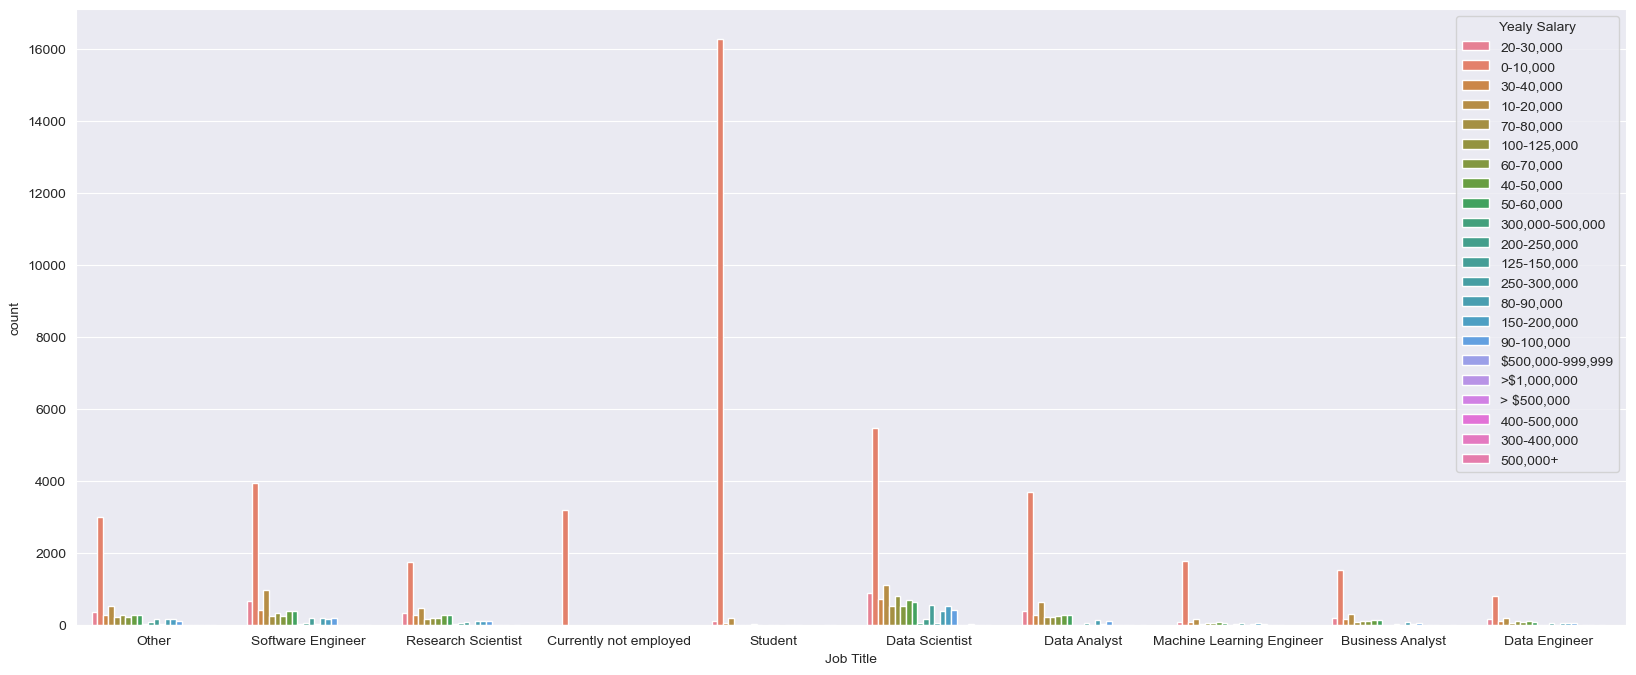

In [81]:
plt.figure(figsize= (20, 8))
top_5_jobs = df['Job Title'].value_counts().head(10).index
sns.countplot(x= 'Job Title', data= df[df['Job Title'].isin(top_5_jobs)], hue="Yealy Salary")